<a href="https://colab.research.google.com/github/B-Lorentz/physics-bsc-visual/blob/main/3_Exact_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

import numpy as np
from matplotlib import pyplot as plt
from jax import numpy as jnp
from jax import grad, vmap, jit, random, lax, ops
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, widgets
from sympy import *
init_printing()

# Problems with exact solutions

### Damped harmonic oscillator

$$\ddot{x} + 2\beta\dot{x} + \omega_0^2 x=0$$

$$x(t) = A(t)\sin(\omega t + \phi)$$


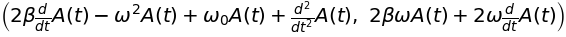

In [23]:
x, t, beta, w, w_0 = symbols("x t beta omega omega_0",real=True)
A = Function("A")(t)
xa = A*sin(w*t)
eq = (diff(diff(xa, t), t) + 2*beta*diff(xa, t) + w_0*xa).expand()
eq.coeff(sin(w*t)), eq.coeff(cos(w*t))

$$[\ddot{A} + 2\beta \dot{A} + (\omega_0^2 - \omega^2)A]\sin(\omega t +\phi) = 0$$

$$[2\omega(\dot{A} + \beta A)]\cos(\omega t +\phi) = 0$$

$$A(t) = A_0 e^{-\beta t}$$

$$\omega = \sqrt{\omega_0^2 - \beta^2}$$

In [34]:
def plot(b):
  xaf =  lambda t: jnp.exp(-b*t)*jnp.sin(jnp.sqrt(1-b**2)*t)
  ts = np.linspace(0, 20, 1000)
  plt.figure(figsize=(12, 6))
  plt.plot(ts, xaf(ts))
  plt.plot(ts, np.zeros_like(ts), "black")
  plt.grid()
  plt.xlabel("t", fontsize=14)
  plt.ylabel("$x/A_0$", fontsize=14)

interact(plot, b=widgets.FloatSlider(value=0.5, min=0.0, max=0.9))

interactive(children=(FloatSlider(value=0.5, description='b', max=0.9), Output()), _dom_classes=('widget-inter…

<function __main__.plot>

## Driven oscillator

$$\ddot{x} + 2\beta\dot{x} + \omega_0^2 x= a_0 \sin(\omega t)$$

$$x(t) = A\sin(\omega t + \phi)$$

$$A = \frac{a_0}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\beta^2 \omega^2}}$$

$$\tan(\phi) = \frac{2\beta\omega}{\omega^2 - \omega_0^2}$$

In [50]:
 def plot1(w, b):
  print(w)
  w_0 = 1.0 
  dfun =lambda w: np.arctan(2*b*w/(w**2-w_0**2))
  Afun = lambda w: 1/jnp.sqrt((w**2-w_0**2)**2 + 4*b**2*w**2)
  xaf =  lambda t: jnp.sin(w*t + dfun(w))*Afun(w)

  ts = np.linspace(0, 40, 1000)
  plt.figure(figsize=(18, 6))
  plt.subplot(131)
  plt.plot(ts, np.sin(w*ts), label="a/a_0")
  plt.plot(ts, xaf(ts), label="x(t)/a_0")
  plt.plot(ts, np.zeros_like(ts), "black")
  plt.grid()
  plt.xlabel("t", fontsize=14)
  plt.legend(fontsize=14)
  plt.subplot(132)
  ws = np.linspace(0.1, 2.0, 200)
  plt.plot(ws, Afun(ws))
  plt.plot([w], Afun(w), "rx")
  plt.xlabel("$\omega$", fontsize=14)
  plt.ylabel("$A$", fontsize=14)
  plt.grid()
  plt.subplot(133)
  ws = np.linspace(0.0, 2.0, 200)
  plt.plot(ws, dfun(ws))
  plt.plot([w], dfun(w), "rx")
  plt.xlabel("$\omega$", fontsize=14)
  plt.ylabel("$\phi$", fontsize=14)
  plt.grid()

interact(plot1, b=widgets.FloatSlider(value=0.25, min=0.01, max=0.5, step=0.01), w=widgets.FloatSlider(value=0.1, min=0.0, max=2.0, step=0.04999))
None

interactive(children=(FloatSlider(value=0.1, description='w', max=2.0, step=0.04999), FloatSlider(value=0.25, …

# Linear chain

$$\ddot{u}_i = \omega_0^2(u_{i+1} + u_{i-1} - 2 u_i)$$

Written as matrix equation: 

$$\ddot{u} = \mathbf{D} u$$

$$u_i(t) = A(q)e^{jiqa}e^{j\omega t}$$

Eigenvalue problem. Periodic boundary condition: $$A_0 = 1 = A_N = e^{jqaN} \implies q = k\cdot\frac{2 \pi}{a N}$$

$$\omega^2 = 2\omega_0^2|\sin(q a/2)|$$

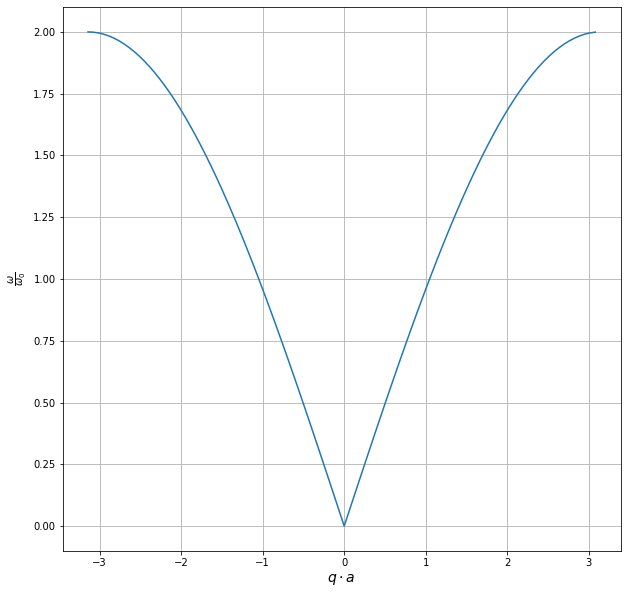

In [55]:
def plot2():
  plt.figure(figsize=(10,10))
  plt.grid()
  N = 100
  qs = np.arange(-50, 50)*2*np.pi/N
  plt.plot(qs, 2*np.abs(np.sin(qs/2)))
  plt.xlabel(r"$q\cdot a$", fontsize=14)
  plt.ylabel(r"$\frac{\omega}{\omega_0}$", fontsize=14)
plot2()

## Schrödinger equation in finite square potential well

$$H\psi = E\psi$$

$$\frac{-\hbar^2}{2 m}\psi'' - V(x)=-|E|\psi$$

Three equations for the three regions. $\psi$ and $\psi'$ must match on the boundary. This gives a transcendent equation

In [74]:
def plot3(E):
  plt.figure(figsize=(16, 8))
  plt.subplot(121)
  plt.xlabel('x', fontsize=14)
  xs = np.linspace(-1.0, 1.0, 200)
  V = lambda x: -1.0*(np.abs(x)<0.5)
  plt.plot(xs, V(xs))
  kap = np.sqrt(2*np.abs(E))
  k = np.sqrt(-2*(-1 - np.abs(E)))
  A = 1.0
  D = A*np.exp(-kap*0.5)/np.cos(k*0.5)
  n1, n2 = xs<-0.5, xs>0.5 
  plt.plot(xs, A*np.exp(kap*xs)*n1 + D*np.cos(k*xs)*((~n1) & (~n2)) + A*np.exp(-kap*xs)*n2)
  plt.grid()


interact(plot3, E = widgets.FloatSlider(-0.2, min=-3.5, max=-0.0, step=0.01))

interactive(children=(FloatSlider(value=-0.2, description='E', max=-0.0, min=-3.5, step=0.01), Output()), _dom…

<function __main__.plot3>